# Sentiment Evaluation

The purpose of this notebook is to explore the implementation of the Vader lexicon for Twitter sentiment analysis.

It will be composed broadly of two tests:

1) First, explore the data set provided for a review of the broad sentiment across 'topics'.

2) Then, assess the accuracy of the sentiment scores against a manual interpretation.

In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# read all sample tweets.

with open('all_stripped_tweets.json', "r", encoding="utf-8") as f:  
    records=[json.loads(line) for line in f]
    

In [3]:
# example read json of first record

records[0]

{'coordinates': None,
 'place': {'attributes': {},
  'bounding_box': {'coordinates': [[[-3.640637, 52.947131],
     [-3.640637, 55.188879],
     [-1.909626, 55.188879],
     [-1.909626, 52.947131]]],
   'type': 'Polygon'},
  'country': 'United Kingdom',
  'country_code': 'GB',
  'full_name': 'North West, England',
  'id': '0cbfb5dccb8131b8',
  'name': 'North West',
  'place_type': 'admin',
  'url': 'https://api.twitter.com/1.1/geo/id/0cbfb5dccb8131b8.json'},
 'region_id': '0_242',
 'sentiment': {'compound': 0.807, 'neg': 0.0, 'neu': 0.611, 'pos': 0.389},
 'text': 'Definitely shared some #wednesdaywisdom this morning at our #budget update event! thanks to @Widdop @MarkHeppell… https://t.co/dqk3y1td6t',
 'timestamp': 1489576680,
 'topic': None,
 'tweet_id': 841971738292432896,
 'user_location': 'Manchester, Stockport & London'}

In [4]:
# combine relevant details into one list

data = []

for i in range(0,len(records)):
    text = records[i]['text']
    topic = records[i]['topic']
    comp = records[i]['sentiment']['compound']
    pos = records[i]['sentiment']['pos']
    neu = records[i]['sentiment']['neu']
    neg = records[i]['sentiment']['neg']
    
    comb = [text,topic,comp,pos,neu,neg]
    
    data.append(comb)
#print(data)

In [5]:
# pass list to dataframe

df = pd.DataFrame(data,columns=['text','topic','compound','positive','neutral','neg'])

df.tail()

,text,topic,compound,positive,neutral,neg
28410,@realDonaldTrump A NEW ERA OF AMERICAN POLLUTI...,Trump,0.0,0.0,1.0,0.0
28411,"ya got to give it to Farage, took everything t...",British Politics,0.0,0.0,1.0,0.0
28412,Bonne nuit les twittos . Devant tant d'incerti...,British Politics,0.0,0.0,1.0,0.0
28413,@werewolf_fr @nobordersman dis toi que les 3% ...,British Politics,0.0,0.0,1.0,0.0
28414,My thoughts on #brexitday https://t.co/B0mj8DEOzA,British Politics,0.0,0.0,1.0,0.0


In [6]:
# nparray of unique topics

df.topic.unique()

array([None, 'Whisper', 'Douvan', '#wednesdaywisdom', '#celebratesuccess',
       '#PMQs', 'NICs', 'Willoughby Court', 'Special Tiara', '#sunshine',
       'Yahoo', 'Coral Cup', 'Cause of Causes', 'U-turn', '#Nibbies',
       'Flying Tiger', '#PinkMatterPodcast', 'Champion Bumper',
       '#famouslyrubbish', '#GoodNewsIn5Words', 'Monaco',
       '#BoutiqueyWhisky', '#ASMMCI', '#BelieveItOrNotIm', 'Mbappe',
       '#selfieforseb', '#hiddenrestaurants', '#GovePortes', 'Mendy',
       'Bernardo Silva', 'Yaya', 'Fabinho', '#littlebigshots', 'Nunu',
       'Sterling', 'Aguero', '#weddinghour', '#Benidorm', 'Man City',
       'Champions League', '#bkchatldn', '#manonthemoor', 'De Bruyne',
       '#Dutchvote', 'Hawaii', 'Djokovic', '#NolanLIVE',
       '#TurkishAirlinesHelpSomalia', 'Nadal', '#BeforeTheInternetExisted',
       '#ThursdayThoughts', '#IndvAus', 'Electoral Commission', 'PM Rutte',
       '#BBCSchoolReport', '#NetherlandsElections', 'Conservative Party',
       'Dominic Raab', '#

In [7]:
# find the count of tweets per topic

df2 = df.groupby(by="topic").count()
df2 = df2.drop(['compound','positive','neutral','neg'],axis =1)
df2 = df2.sort_values('text',ascending=False)
df2.head()

,text
topic,
British Politics,8122
Westminster,2818
#Westminster,2503
#StPatricksDay,2019
#GERENG,964



Total Number of topics: 
 459


/home/benjamin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


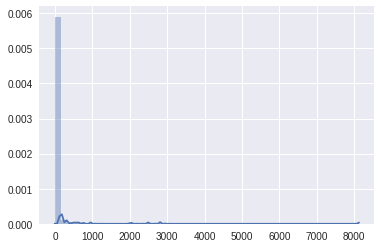

In [8]:
# Whats the distribution of tweets per topic

print("\nTotal Number of topics: \n",len(df2))

# df2.plot.hist(df2)
sns.distplot(df2)


Total number of topics with >300 tweets: 
12 



/home/benjamin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


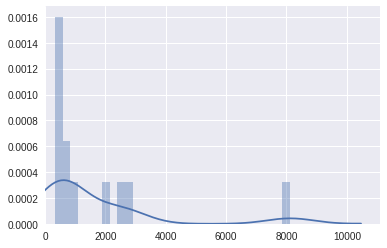

In [9]:
# The histogram highlights of topics are 1 tweet/ topic - we need to strip these out by setting a min threshold
# no reason for 300

lim = 300

df_2 = df2[df2['text']>lim]

#df_2.plot.hist(df_2)
sns.distplot(df_2,bins=30)
sns.plt.xlim(0)

print("\nTotal number of topics with >%d tweets: \n%d \n"%(lim, len(df_2)))




We can see there are only 12 topics which breach the threshold of 300.

We shall now review the distribution of overall compound scores, before reviewing these 12 topics.


/home/benjamin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


15637   -0.9690
16039   -0.9686
20554   -0.9659
20857   -0.9648
14991   -0.9648
Name: compound, dtype: float64

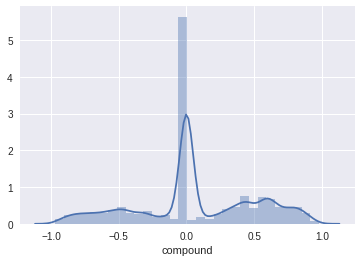

In [10]:
# histogram of all compound scores

df_hist = df['compound'].sort_values()
#df_hist.plot.hist(df_hist)
sns.distplot(df_hist,bins=30)
df_hist.head()

In [11]:
# An error is appearing, so check a count of the zero scores

df_var = df[df['compound']==0]
df_var.count()


text        10176
topic       10096
compound    10176
positive    10176
neutral     10176
neg         10176
dtype: int64

In [12]:
# strip out those with a score of 0

df_1 = df[df['compound']!=0]
df_1.head()

,text,topic,compound,positive,neutral,neg
0,Definitely shared some #wednesdaywisdom this m...,None,0.8070,0.389,0.611,0.0
1,Hope everyone supports this #BeKind,None,0.6597,0.643,0.357,0.0
2,#wednesdaywisdom #thismorning #BeKind The smal...,None,0.4019,0.162,0.838,0.0
4,"Motto for David Davis ""He Who Dares Wins"" This...",None,0.9042,0.359,0.641,0.0
7,@eddwilson @IanDunt To be fair David Davis doe...,None,0.3182,0.141,0.859,0.0


In [13]:
# whats the count of the remaining tweets

df_1.count()

text        18239
topic       18095
compound    18239
positive    18239
neutral     18239
neg         18239
dtype: int64

/home/benjamin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


15637   -0.9690
16039   -0.9686
20554   -0.9659
20857   -0.9648
14991   -0.9648
Name: compound, dtype: float64

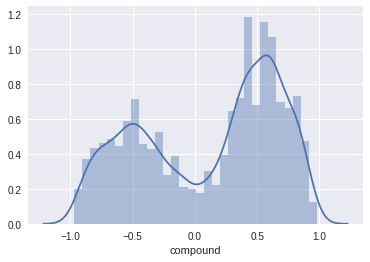

In [14]:
# view the new set of scores

df_hist_1 = df_1['compound'].sort_values()

#df_hist_1.plot.hist(df_hist_1,ylim=(0,175))
sns.distplot(df_hist_1,bins=30)

df_hist_1.head()

In [15]:
# retrieve the measures of central tendancy

df_hist_1.describe()

count    18239.000000
mean         0.115339
std          0.554796
min         -0.969000
25%         -0.424050
50%          0.303600
75%          0.585900
max          0.980300
Name: compound, dtype: float64

In [16]:
# build another dataframe of the top 12 topics and their compound scores


topics_list = df_2.index.values.tolist()

all_topics = pd.DataFrame()

for topic_i in topics_list:
    topic = df_1[df['topic']==topic_i]
    
    all_topics = pd.concat([all_topics,topic])

#topic.head()

all_topics = all_topics.drop(['text','positive','neutral','neg'],axis =1)
all_topics.head()

/home/benjamin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,topic,compound
8198,British Politics,0.4795
8200,British Politics,0.3167
8202,British Politics,0.0772
8204,British Politics,0.6249
8206,British Politics,0.6249


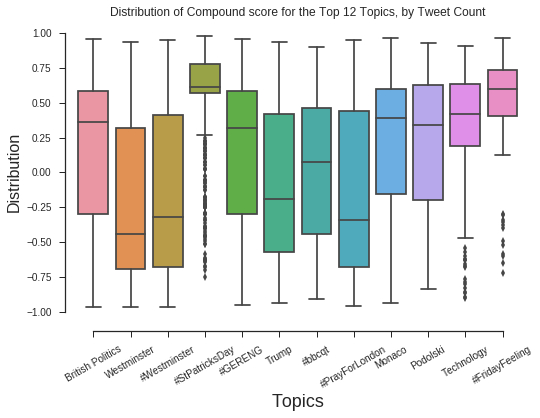

In [17]:
sns.set(style="ticks")
sns.boxplot(data=all_topics,x="topic", y="compound")#, orient="h");
sns.despine(offset=10, trim=True)

plt.title("Distribution of Compound score for the Top 12 Topics, by Tweet Count")
plt.xlabel('Topics', fontsize=18)
plt.ylabel('Distribution', fontsize=16)
plt.xticks(rotation=30)
plt.figure(figsize=(80, 60))
#plt.rcParams['figure.figsize']=(30,30)
plt.show();



In [18]:
len(df)

28415

In [19]:
from random import randint

In [20]:
random_list = []

for i in range(0,100):
    random_list.append(randint(1,len(df)))
    
random_list[:3]

[12678, 5261, 16053]

In [21]:


df_rand = df.iloc[random_list]

df_rand.head()

#len(df_rand)

,text,topic,compound,positive,neutral,neg
12678,Everything that is wrong with modern society i...,Westminster,-0.7579,0.0,0.711,0.289
5261,@Super6 Roy Keane does not 😉,Roy Keane,0.0000,0.0,1.000,0.000
16053,Buzzing for GM's reunion this weekend 👅💃👭 @lis...,British Politics,0.0000,0.0,1.000,0.000
19657,Typical England we go a goal behind and it's p...,#GERENG,-0.5106,0.0,0.752,0.248
22218,This massive hover fly is a wasp parasite! #T...,British Politics,0.0000,0.0,1.000,0.000


In [22]:

df_rand.to_csv('random_tweets.csv')



In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

/home/benjamin/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [24]:
text_test = df_rand.iloc[1][0]

ss = sid.polarity_scores(text_test)

ss

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

/home/benjamin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j



Total number of topics with >10 tweets: 
290 



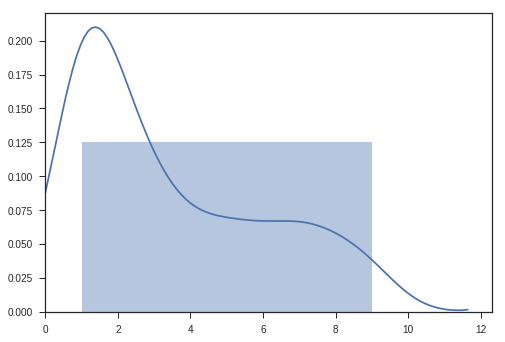

In [25]:
# The histogram highlights of topics are 1 tweet/ topic - we need to strip these out by setting a min threshold
# no reason for 300

lim = 10

df_min = df2[df2['text']<lim]

#df_2.plot.hist(df_2)
sns.distplot(df_min,bins=1)
sns.plt.xlim(0)

print("\nTotal number of topics with >%d tweets: \n%d \n"%(lim, len(df_min)))